Assignment 03

Part 01

Grid World Environment 

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the GridWorld environment
class GridWorld:
    def __init__(self, grid_size, start_pos, red_states, Terminate_states):
        self.grid_size = grid_size
        self.start_pos = start_pos
        self.red_states = red_states
        self.Terminate_states = Terminate_states

    def reset(self):
        self.current_pos = self.start_pos
        return self.current_pos

    def step(self, action):
        next_pos = (self.current_pos[0] + action[0], self.current_pos[1] + action[1])

        if next_pos[0] < 0 or next_pos[0] >= self.grid_size[0] or next_pos[1] < 0 or next_pos[1] >= self.grid_size[1]:
            return self.current_pos, -1, False

        if next_pos in self.red_states:
            self.current_pos = self.start_pos
            return self.current_pos, -20, False
        
        if next_pos in self.Terminate_states:
            return next_pos, 0, True

        self.current_pos = next_pos
        return next_pos, -1, False


Sarsa Algorithm

In [27]:
# Define the Sarsa algorithm
def sarsa(env, Q, num_episodes, alpha, gamma, epsilon):
    rewards_per_episode = []
    for episode in range(num_episodes):
        total_reward = 0
        state = env.reset()
        action = choose_action(state, Q, epsilon)
        done = False
        while not done:
            next_state, reward, done = env.step(action)
            total_reward += reward
            next_action = choose_action(next_state, Q, epsilon)
            Q[state[0], state[1], actions.index(action)] += alpha * (reward + gamma * Q[next_state[0], next_state[1], actions.index(next_action)] - 
                                                                     Q[state[0], state[1], actions.index(action)])
            state, action = next_state, next_action
        rewards_per_episode.append(total_reward)
    return Q, rewards_per_episode


Q-learning Algorithm

In [28]:
# Define the Q-learning algorithm
def q_learning(env, Q, num_episodes, alpha, gamma, epsilon):
    rewards_per_episode = []
    for episode in range(num_episodes):
        total_reward = 0
        state = env.reset()
        done = False
        while not done:
            action = choose_action(state, Q, epsilon)
            next_state, reward, done = env.step(action)
            total_reward += reward
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], actions.index(action)] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] -
                                                                      Q[state[0], state[1], actions.index(action)])
            state = next_state
        rewards_per_episode.append(total_reward)
    return Q, rewards_per_episode


Initialization

In [29]:

 #Epsilon-greedy action selection function
def choose_action(state, Q, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)
    else:
        return actions[np.argmax(Q[state[0], state[1]])]

# Initialize environment with the actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
grid_size = (5, 5)
start_pos = (4, 0)
red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
Terminate_states = [(0, 0), (0, 4)]
env = GridWorld(grid_size, start_pos, red_states, Terminate_states)

# Initialize Q-table for Sarsa
Q_sarsa = np.zeros((grid_size[0], grid_size[1], len(actions)))

# Run Sarsa learning
Q_sarsa, rewards_per_episode_sarsa = sarsa(env, Q_sarsa, 10000, 0.5, 0.9, 0.2)

# Initialize Q-table for Q-learning
Q_q_learning = np.zeros((grid_size[0], grid_size[1], len(actions)))

# Run Q-learning
Q_q_learning, rewards_per_episode_q_learning = q_learning(env, Q_q_learning, 10000, 0.5, 0.9, 0.2)

#Function to simulate an episode
def simulate_episode(env, Q, max_steps=100):
    state = env.reset()
    path = [state]
    for _ in range(max_steps):
        action_index = np.argmax(Q[state[0], state[1]])
        action = actions[action_index]
        next_state, reward, done = env.step(action)
        path.append(next_state)
        if done:
            break
        state = next_state
    return path


Plots

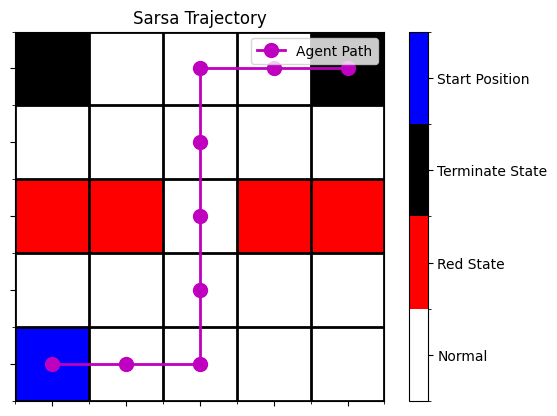

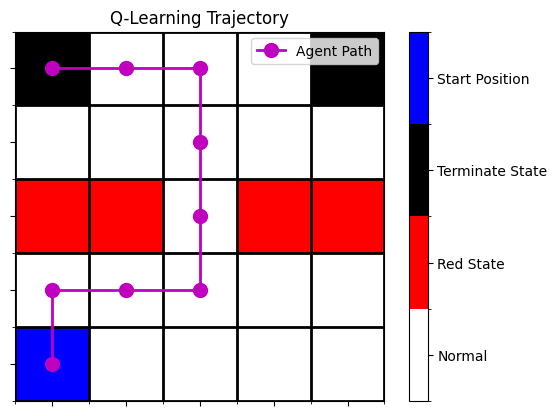

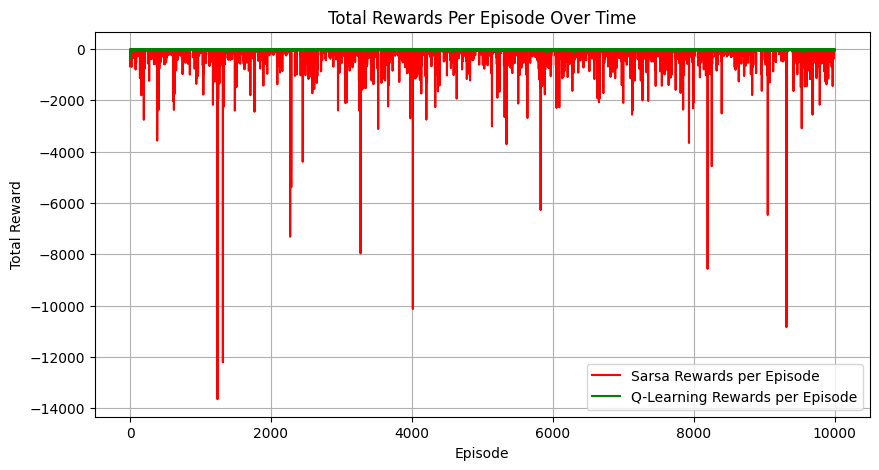

In [30]:
# Plot rewards per episode
def plot_rewards(rewards_per_episode_sarsa, rewards_per_episode_q_learning):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_per_episode_sarsa, label='Sarsa Rewards per Episode',color='r')
    plt.plot(rewards_per_episode_q_learning, label='Q-Learning Rewards per Episode',color='g')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards Per Episode Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot trajectory of the agent
def plot_trajectory(grid_size, start_pos, path, red_states, black_states, title):
    grid = np.zeros(grid_size, dtype=int)
    for r in red_states:
        grid[r] = 1
    for b in black_states:
        grid[b] = 2
    grid[start_pos] = 3

    cmap = mcolors.ListedColormap(['white', 'red', 'black', 'blue'])
    bounds = [0, 1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    cax = ax.imshow(grid, cmap=cmap, norm=norm, interpolation='nearest')
    colorbar = fig.colorbar(cax, ticks=[0.5, 1.5, 2.5, 3.5])
    colorbar.set_ticklabels(['Normal', 'Red State', 'Terminate State', 'Start Position'])

    y, x = zip(*path)
    ax.plot(x, y, 'mo-', linewidth=2, markersize=10, label='Agent Path')
    ax.legend()

    ax.set_xticks(np.arange(-0.5, grid_size[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1), minor=True)
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(grid_size[1]))
    ax.set_yticks(np.arange(grid_size[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.title(title)
    plt.show()

# Simulate episodes for both methods
path_sarsa = simulate_episode(env, Q_sarsa)
path_q_learning = simulate_episode(env, Q_q_learning)

# Plot trajectories for both methods with titles
plot_trajectory(grid_size, start_pos, path_sarsa, red_states, Terminate_states, 'Sarsa Trajectory')
plot_trajectory(grid_size, start_pos, path_q_learning, red_states, Terminate_states, 'Q-Learning Trajectory')

# Plot rewards for both methods
plot_rewards(rewards_per_episode_sarsa, rewards_per_episode_q_learning)
